I create the the cluster file using the cleaned csv and load the file

In [6]:
import pandas as pd

In [7]:
# reading the csv file
df=pd.read_csv('cluster.csv')

In [8]:
df

,Unnamed: 0.1,Unnamed: 0,comment,nhelpful,unixtime,work,user,stars,time,abuse,not_a_review,new_comment,genres,processed_review,genre_cluster,user_cluster
0,0,0,every evening the brave queen of persia shahra...,0,1.332288e+09,73960,Elizabeth.Wong98,4.5,"Mar 21, 2012",False,False,everi even brave queen persia shahrazad goe su...,romance,everi even brave queen persia shahrazad goe su...,3,2
1,2,2,i became privy to this book when another autho...,0,1.299888e+09,9523995,suz.haugland,4.0,"Mar 12, 2011",False,False,becam privi book anoth author enjoy read recom...,"romance, action",becam privi book anoth author enjoy read recom...,3,14
2,4,4,this is a tremendous story of a freed woman an...,0,1.329005e+09,11243828,CandyH,4.0,"Feb 12, 2012",False,False,tremend stori freed woman famili sold slaveri ...,NaN,tremend stori freed woman famili sold slaveri ...,3,1
3,7,7,a new designer drug that makes people very agg...,0,1.227226e+09,32125,mab2008,3.5,"Nov 21, 2008",False,False,new design drug make peopl aggress medic resea...,horror,new design drug make peopl aggress medic resea...,2,16
4,8,8,great,0,1.377216e+09,1110874,Mamajeanne,5.0,"Aug 23, 2013",False,False,great,NaN,great,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960086,1387117,1707060,i have read better books about houses and fami...,0,1.248048e+09,2129329,heidijane,4.0,"Jul 20, 2009",False,False,read better book hous famili dark past still e...,historical fiction,read better book hous famili dark past still e...,1,4
960087,1387118,1707061,chess is still a lot messed up in the head she...,0,1.373242e+09,11234213,wyvernfriend,3.5,"Jul 8, 2013",False,False,chess still lot mess head she still drug tri d...,"romance, historical fiction, action",chess still lot mess head still drug tri despe...,3,13
960088,1387121,1707064,i came to this book with low expectations the ...,0,1.314230e+09,11633344,TheLogo,4.5,"Aug 25, 2011",False,False,came book low expect reput author drew alon en...,romance,came book low expect reput author drew alon en...,1,2
960089,1387122,1707066,this is a fairy tale which is very much a cupi...,0,1.364688e+09,11749693,AmyMacEvilly,5.0,"Mar 31, 2013",False,False,fairi tale much cupid amp psychebeauti amp bea...,action,fairi tale much cupid amp psychebeauti amp bea...,2,0


In [12]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tensorflow_hub as hub

2023-04-28 13:43:29.179532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# drop null values
df=df.dropna()

In [15]:
# extract features from preprocessed reviews using TF-IDF
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df['genres'])

In [16]:
# printing the genres of tfidf_matrix
vectorizer.get_feature_names_out()

array(['action', 'adult', 'adventure', 'biography', 'comedy', 'crime',
       'drama', 'fantasy', 'fiction', 'historical', 'horror', 'romance',
       'thriller', 'young'], dtype=object)

In [17]:
# K-means clustering with 21 clusters
kmeans = KMeans(n_clusters=21, random_state=42)
clusters = kmeans.fit_predict(features)

/home/wencen_wu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# print the cluster centers
silhouette_avg = silhouette_score(features, clusters)
print(f'Silhouette score: {silhouette_avg:.2f}')

# add genre clusters to dataframe
df['genre_cluster'] = clusters

Silhouette score: 0.78


In [19]:
# using the unvieral sentence encoder to embed the genres
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
cluster_embeddings = embed(df['genres'].tolist())

# train K-Means clustering model to cluster users based on genre preferences
kmeans = KMeans(n_clusters=21, random_state=42)
clusters = kmeans.fit_predict(cluster_embeddings)

# add user clusters to dataframe
df['user_cluster'] = clusters
# display results
print(df[['user', 'genres', 'genre_cluster', 'user_cluster']])

2023-04-28 13:43:39.572610: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_INVALID_VALUE: invalid argument
2023-04-28 13:43:39.572636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: wencen-wu-alienware
2023-04-28 13:43:39.572641: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: wencen-wu-alienware
2023-04-28 13:43:39.572702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-04-28 13:43:39.572726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 470.131.0
2023-04-28 13:43:42.384248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVA

                  user                       genres  genre_cluster  \
0     Elizabeth.Wong98                      romance              0   
1         suz.haugland              romance, action              6   
3              mab2008                       horror              9   
7            bluetyson           historical fiction             17   
8             Kristelh           historical fiction             17   
...                ...                          ...            ...   
9985            Mike-L                      romance              0   
9986           haritsa                      romance              0   
9995       DebbiePearl              romance, horror              9   
9998          jnsmith1                      romance              0   
9999              kofu  romance, historical fiction              5   

      user_cluster  
0                1  
1               16  
3                4  
7                2  
8                2  
...            ...  
9985        

In [20]:
df

,Unnamed: 0.1,Unnamed: 0,comment,nhelpful,unixtime,work,user,stars,time,abuse,not_a_review,new_comment,genres,processed_review,genre_cluster,user_cluster
0,0,0,every evening the brave queen of persia shahra...,0,1.332288e+09,73960,Elizabeth.Wong98,4.5,"Mar 21, 2012",False,False,everi even brave queen persia shahrazad goe su...,romance,everi even brave queen persia shahrazad goe su...,0,1
1,2,2,i became privy to this book when another autho...,0,1.299888e+09,9523995,suz.haugland,4.0,"Mar 12, 2011",False,False,becam privi book anoth author enjoy read recom...,"romance, action",becam privi book anoth author enjoy read recom...,6,16
3,7,7,a new designer drug that makes people very agg...,0,1.227226e+09,32125,mab2008,3.5,"Nov 21, 2008",False,False,new design drug make peopl aggress medic resea...,horror,new design drug make peopl aggress medic resea...,9,4
7,13,14,in these days of echelon satellite spying and ...,1,1.169856e+09,1472,bluetyson,5.0,"Jan 27, 2007",False,False,day echelon satellit spi everincreas prolifer ...,historical fiction,day echelon satellit spi everincreas prolifer ...,17,2
8,14,16,this graphic novel was published in 1986 and i...,0,1.328054e+09,7233,Kristelh,4.0,"Feb 1, 2012",False,False,graphic novel publish comic stori art form sto...,historical fiction,graphic novel publish comic stori art form sto...,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,14539,17833,interesting character study of a family in cri...,0,1.365379e+09,159834,Mike-L,4.0,"Apr 8, 2013",False,False,interest charact studi famili crisi great book...,romance,interest charact studi famili crisi great book...,0,1
9986,14540,17835,every fan of the graphic novel format chooses ...,1,1.275955e+09,2333448,haritsa,4.0,"Jun 8, 2010",False,False,everi fan graphic novel format choos moment me...,romance,everi fan graphic novel format choos moment me...,0,1
9995,14553,17849,i loved nancy mosers writing the authoress eng...,0,1.311466e+09,8035982,DebbiePearl,5.0,"Jul 24, 2011",False,False,love nanci moser write authoress english creat...,"romance, horror",love nanci moser write authoress english creat...,9,19
9998,14558,17855,the book broken into three parts is a gem i lo...,0,1.194307e+09,5189,jnsmith1,4.0,"Nov 6, 2007",False,False,book broken three part gem love way tire stori...,romance,book broken three part gem love way tire stori...,0,1


In [22]:
def get_user_genres(df, user):
    user_df = df[df['user'] == user]  # Filter rows for the specified user
    user_genres = user_df['genres'].tolist()  # Get the genres column as a list
    user_genres = [genre.split(',') for genre in user_genres]  # Split genres by comma
    user_genres = [genre.strip() for sublist in user_genres for genre in sublist]  # Flatten the list of genres
    user_genres = list(set(user_genres))  # Remove duplicates using a set
    return user_genres


all_user_genres = [] # List to store the genres for all users

unique_users = df['user'].unique()  # Get the unique users from the DataFrame

for user in unique_users:
    user_genres = get_user_genres(df, user)

    all_user_genres.append({'user': user, 'genres': user_genres})

# Create a DataFrame from the list of all the user's genres and users
user_genres_df = pd.DataFrame(all_user_genres)


In [23]:
# Print the genres for each user
for i, user_genres in enumerate(all_user_genres):
    print(f"User {i+1} genres: {user_genres}")

User 1 genres: {'user': 'Elizabeth.Wong98', 'genres': ['romance', 'horror']}
User 2 genres: {'user': 'suz.haugland', 'genres': ['action', 'romance']}
User 3 genres: {'user': 'mab2008', 'genres': ['horror']}
User 4 genres: {'user': 'bluetyson', 'genres': ['crime', 'adventure', 'romance', 'horror', 'fantasy', 'action', 'young adult', 'historical fiction']}
User 5 genres: {'user': 'Kristelh', 'genres': ['romance', 'historical fiction', 'thriller']}
User 6 genres: {'user': 'ebruno', 'genres': ['comedy']}
User 7 genres: {'user': 'Jaie22', 'genres': ['romance']}
User 8 genres: {'user': 'ronda73ca', 'genres': ['biography', 'comedy']}
User 9 genres: {'user': 'AmandaThon', 'genres': ['fantasy']}
User 10 genres: {'user': 'annajamieson', 'genres': ['romance']}
User 11 genres: {'user': 'quilted_kat', 'genres': ['crime']}
User 12 genres: {'user': 'jhibburt', 'genres': ['adventure']}
User 13 genres: {'user': 'Lavinient', 'genres': ['romance', 'horror']}
User 14 genres: {'user': 'branadain', 'genres'

In [146]:
# combine the user_genres_df with the original df
merged_df = pd.merge(df, user_genres_df, on='user')

In [44]:
# creating the list of genres from the top genres from top genres that tdidf vectorizer created 
genre_keywords = {
    'thriller': ['thriller', 'suspense', 'mystery', 'detective'],
    'romance': ['romance', 'love', 'heart', 'passion'],
    'science fiction': ['science fiction', 'sci-fi', 'futuristic', 'aliens'],
    'horror': ['horror', 'terror', 'fear', 'scary'],
    'fantasy': ['fantasy', 'magic', 'mythical', 'adventure'],
    'drama': ['drama', 'emotional', 'relationships', 'character'],
    'historical fiction': ['historical fiction', 'history', 'past', 'period'],
    'comedy': ['comedy', 'funny', 'humor', 'laughs'],
    'action': ['action', 'fast-paced', 'exciting', 'adrenaline'],
    'mystery': ['mystery', 'puzzle', 'investigation', 'clues'],
    'biography': ['biography', 'memoir', 'life story', 'autobiography'],
    'science': ['science', 'scientific', 'exploration', 'knowledge'],
    'adventure': ['adventure', 'journey', 'quest', 'exploration'],
    'fantasy romance': ['fantasy romance', 'magical love', 'enchanted', 'supernatural'],
    'thriller mystery': ['thriller mystery', 'suspenseful', 'puzzling', 'intrigue'],
    'historical romance': ['historical romance', 'period love', 'past era', 'passionate'],
    'science fiction fantasy': ['science fiction fantasy', 'sci-fi fantasy', 'imaginative', 'otherworldly'],
    'horror thriller': ['horror thriller', 'terrifying', 'frightening', 'suspenseful'],
    'young adult': ['young adult', 'teenagers', 'coming-of-age', 'youth'],
    'crime': ['crime', 'criminal', 'illegal', 'investigation'],
    'paranormal': ['paranormal', 'supernatural', 'ghosts', 'haunted'],
    
}


In [111]:
# creating the list of genres from the top genres from top genres that tdidf vectorizer created
genre_name = list(genre_keywords.keys())
print(genre_name)


['thriller', 'romance', 'science fiction', 'horror', 'fantasy', 'drama', 'historical fiction', 'comedy', 'action', 'mystery', 'biography', 'science', 'adventure', 'fantasy romance', 'thriller mystery', 'historical romance', 'science fiction fantasy', 'horror thriller', 'young adult', 'crime', 'paranormal']


In [46]:
import numpy as np

In [ ]:
# create a matrix of zeros with the number of rows equal to the number of users and the number of columns equal to the number of genres
matrix=np.zeros((len(user_genres_df),len(genre_name)))
for i, user_gen in enumerate(user_genres_df['genres']):
    for gen in user_gen:
        j = genre_name.index(gen)
        matrix[i,j]=1

In [48]:
matrix[:5]

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 1., 0.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [60]:
# finding the cosine similarity between the users
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(matrix)

In [61]:
# printing the similarity matrix
similarity

array([[1.        , 0.5       , 0.70710678, ..., 1.        , 0.70710678,
        0.5       ],
       [0.5       , 1.        , 0.        , ..., 0.5       , 0.70710678,
        0.5       ],
       [0.70710678, 0.        , 1.        , ..., 0.70710678, 0.        ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.70710678, ..., 1.        , 0.70710678,
        0.5       ],
       [0.70710678, 0.70710678, 0.        , ..., 0.70710678, 1.        ,
        0.70710678],
       [0.5       , 0.5       , 0.        , ..., 0.5       , 0.70710678,
        1.        ]])

In [51]:
user_sim_df= pd.DataFrame(similarity, columns= user_genres_df['user'], index= user_genres_df['user'])

In [52]:
# save the cosine similarity matrix to a csv file
user_sim_df.to_csv('cosine_similarity.csv')

#### trying the annoy martix to find the similarity

In [34]:

from annoy import AnnoyIndex
import numpy as np

In [63]:
matrix[:5]

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 1., 0.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [64]:

num_trees = 10  # Number of trees to build the index
embedding_dim = matrix.shape[1]
annoy_index = AnnoyIndex(embedding_dim, metric='angular')  # Initialize Annoy index

for i,row in enumerate(matrix):
    annoy_index.add_item(i, row)

annoy_index.build(num_trees)  # Build the index


True

In [77]:

# Calculate similarities using the Annoy index
similarity = np.zeros((matrix.shape[0], matrix.shape[0]))
neighbors_number=3
all_genres = []
for i in range(matrix.shape[0]):
    neighbors_id=annoy_index.get_nns_by_item(i,neighbors_number)  # Retrieve nearest neighbors
    all_genres.append({'user': i, 'genres': neighbors_id})




In [78]:
all_genres

[{'user': 0, 'genres': [1824, 2323, 203]},
 {'user': 1, 'genres': [2259, 203, 263]},
 {'user': 2, 'genres': [161, 171, 764]},
 {'user': 3, 'genres': [3, 1148, 302]},
 {'user': 4, 'genres': [43, 886, 1628]},
 {'user': 5, 'genres': [5, 319, 364]},
 {'user': 6, 'genres': [203, 263, 336]},
 {'user': 7, 'genres': [7, 447, 1030]},
 {'user': 8, 'genres': [227, 251, 260]},
 {'user': 9, 'genres': [203, 263, 336]},
 {'user': 10, 'genres': [230, 409, 506]},
 {'user': 11, 'genres': [48, 99, 110]},
 {'user': 12, 'genres': [1824, 2323, 203]},
 {'user': 13, 'genres': [203, 263, 336]},
 {'user': 14, 'genres': [14, 440, 639]},
 {'user': 15, 'genres': [15, 142, 1914]},
 {'user': 16, 'genres': [203, 263, 336]},
 {'user': 17, 'genres': [2514, 1275, 2259]},
 {'user': 18, 'genres': [203, 263, 336]},
 {'user': 19, 'genres': [203, 263, 336]},
 {'user': 20, 'genres': [20, 22, 174]},
 {'user': 21, 'genres': [1824, 2323, 203]},
 {'user': 22, 'genres': [20, 22, 174]},
 {'user': 23, 'genres': [23, 239, 14]},
 {'us

In [ ]:
# Create user similarity dataframe
user_sim_df = pd.DataFrame(similarity, columns=user_genres_df['user'], index=user_genres_df['user'])



In [79]:
# printing the user similarity dataframe from annoy
user_sim_df

user,Elizabeth.Wong98,suz.haugland,mab2008,bluetyson,Kristelh,ebruno,Jaie22,ronda73ca,AmandaThon,annajamieson,...,mamzel,cataryna,fourbears,grnpickle,pinklady60,Mike-L,haritsa,DebbiePearl,jnsmith1,kofu
user,,,,,,,,,,,,,,,,,,,,,
Elizabeth.Wong98,1.000000,0.500000,0.707107,0.500000,0.408248,0.0,0.707107,0.0,0.000000,0.707107,...,0.0,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,1.000000,0.707107,0.500000
suz.haugland,0.500000,1.000000,0.000000,0.500000,0.408248,0.0,0.707107,0.0,0.000000,0.707107,...,0.0,0.000000,0.707107,0.707107,0.707107,0.707107,0.707107,0.500000,0.707107,0.500000
mab2008,0.707107,0.000000,1.000000,0.353553,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000
bluetyson,0.500000,0.500000,0.353553,1.000000,0.408248,0.0,0.353553,0.0,0.353553,0.353553,...,0.0,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.500000,0.353553,0.500000
Kristelh,0.408248,0.408248,0.000000,0.408248,1.000000,0.0,0.577350,0.0,0.000000,0.577350,...,0.0,0.000000,0.577350,0.577350,0.577350,0.577350,0.577350,0.408248,0.577350,0.816497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mike-L,0.707107,0.707107,0.000000,0.353553,0.577350,0.0,1.000000,0.0,0.000000,1.000000,...,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.707107,1.000000,0.707107
haritsa,0.707107,0.707107,0.000000,0.353553,0.577350,0.0,1.000000,0.0,0.000000,1.000000,...,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.707107,1.000000,0.707107
DebbiePearl,1.000000,0.500000,0.707107,0.500000,0.408248,0.0,0.707107,0.0,0.000000,0.707107,...,0.0,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,1.000000,0.707107,0.500000


## trying to find recommendation using the clusters

In [85]:

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Compute user-user similarity matrix
similarity_matrix = user_sim_df

# Convert similarity matrix to distance matrix
distance_matrix = 1 - similarity_matrix

# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=15)
clusters = kmeans.fit_predict(distance_matrix)

# Assign each user to a cluster
user_cluster_df = pd.DataFrame({'user': similarity_matrix.columns, 'cluster': clusters})




/home/wencen_wu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


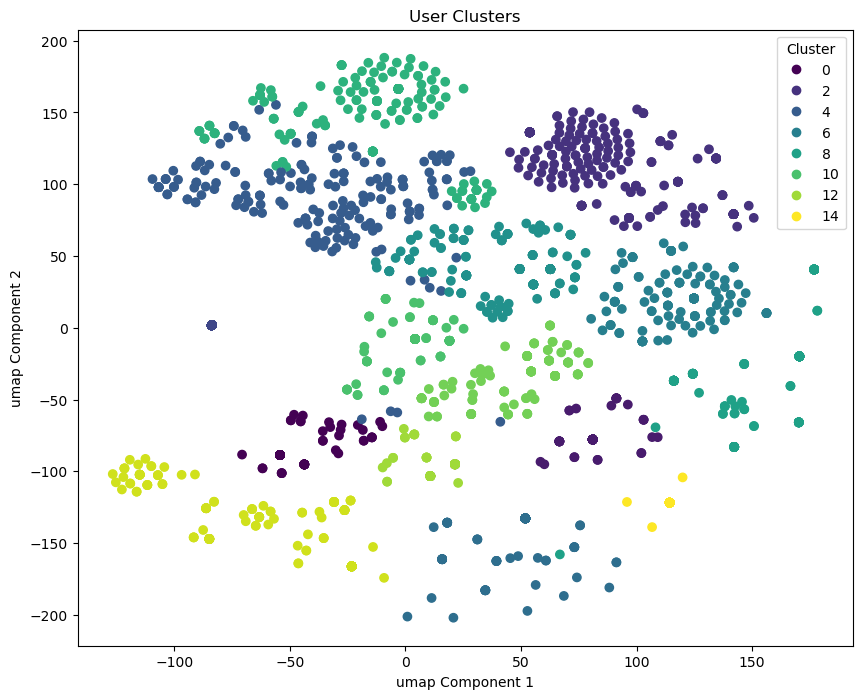

In [107]:
import matplotlib.pyplot as plt
from umap import UMAP

# Reduce the dimensionality of the cluster assignments using UMAP
umap = UMAP(n_components=2)
cluster_umap = umap.fit_transform(distance_matrix)

# Create a scatter plot of the clustered users
plt.figure(figsize=(10, 8))
scatter = plt.scatter(cluster_umap[:, 0], cluster_umap[:, 1], c=clusters, cmap='viridis')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.title('User Clusters')
plt.xlabel('umap Component 1')
plt.ylabel('umap Component 2')
plt.show()


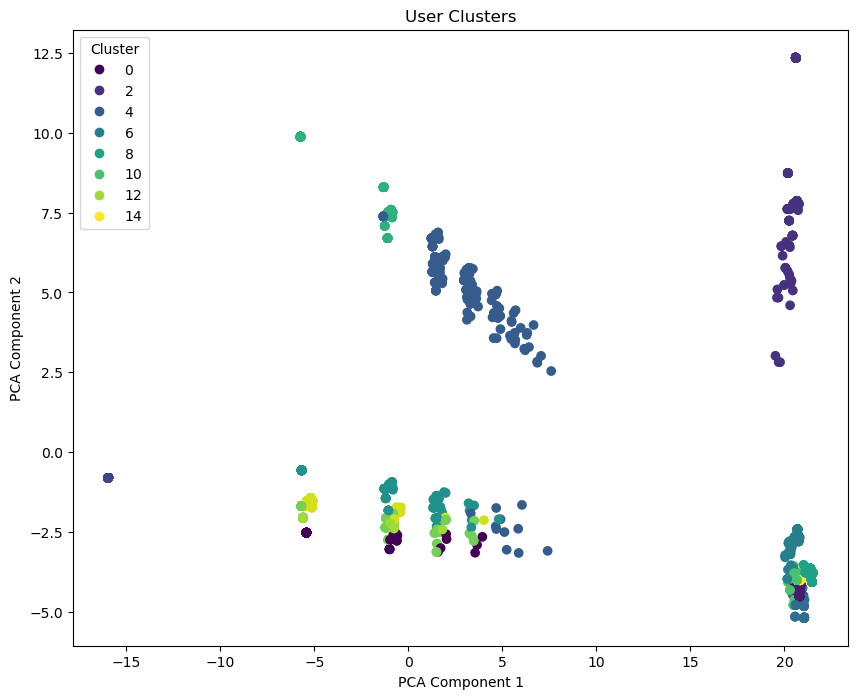

In [99]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of the cluster assignments using PCA
pca = PCA(n_components=2)
cluster_pca = pca.fit_transform(distance_matrix)

# Create a scatter plot of the clustered users
plt.figure(figsize=(10, 8))
scatter = plt.scatter(cluster_pca[:, 0], cluster_pca[:, 1], c=clusters, cmap='viridis')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.title('User Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [125]:
# group of all the users in one cluster
cluster_users = user_cluster_df.groupby('cluster')['user'].apply(lambda x: list(x)).to_dict()


In [186]:
cluster_user_ids=cluster_users[0]

In [187]:
# Recommend items to users in each cluster
import pandas as pd
import numpy as np

# Load the user, book, and genre data into a pandas DataFrame
user_book_genre_df=merged_df
# Generate a list of unique genres
genres = genre_name

# Create a dictionary of genre preferences for each user in the cluster
cluster_preferences = {}
for user_id in cluster_user_ids:
    user_df = user_book_genre_df[user_book_genre_df['user'] == user_id]
    user_genres=[]
    for i in user_df['genres_y']:
        for j in i:
            if j not in user_genres:
                user_genres.append(j)

    # user_genres = user_df['genres_y']
    preferences = {genre: 0 for genre in genres}
    for genre in user_genres:
        preferences[genre] = 1
    cluster_preferences[user_id] = preferences





In [219]:
# Create a DataFrame from the cluster preferences dictionary
recommendation=[]

for one_user in cluster_user_ids:
    random_user = cluster_user_ids
    book_=[]
    for i in random_user:
        
        user_df = user_book_genre_df[user_book_genre_df['user'] == i]
        user_df=user_df.sort_values(by='stars')
        book_list = user_df['work'].tolist()
        book = book_list
        book_.append(book)
    recommendation.append({'user': i, 'book': book_})


In [220]:
# printing the recommendation
recommendation

[{'user': 'mcrotti',
  'book': [[12295849], [13317929], [279353], [7318], [107660]]},
 {'user': 'TadAD',
  'book': [[2122992], [13370716], [10273380], [107660], [19936]]},
 {'user': 'aethercowboy',
  'book': [[11839900], [12890810], [255778], [13317929], [10016908]]},
 {'user': 'Cottontail',
  'book': [[13941965], [7318], [107660], [71687], [11007453]]},
 {'user': 'kidzdoc',
  'book': [[5347613], [6275], [75545], [10016908], [13398902]]},
 {'user': 'tros',
  'book': [[1942777], [12919053], [11823289], [13317929], [258846]]},
 {'user': 'BookNrrrd',
  'book': [[11716130], [9863955], [2298201], [3459], [12172521]]},
 {'user': 'RebeccaAnn',
  'book': [[8547306], [13117059], [80665], [4451], [5347613]]},
 {'user': 'aethercowboy',
  'book': [[6249956], [13032476], [4451], [11007453], [10016908]]},
 {'user': 'austinbarnes',
  'book': [[496866], [12050], [12455021], [3488194], [4451]]},
 {'user': 'multifaceted',
  'book': [[3029847], [13370716], [13117059], [7406], [2236]]},
 {'user': 'Falling